In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from pyclustertend import hopkins
from sklearn.manifold import TSNE
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from scipy.spatial.distance import pdist, squareform
from skfuzzy.cluster import cmeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.decomposition import PCA

In [140]:
nba = pd.read_csv('nba_players.csv')
cbb = pd.read_csv('college_players.csv')

In [141]:
nba_names = nba['name'].to_list()

In [142]:
def f(x):
    if x in nba_names:
        return 1
    return 0

def h(x):
    if x not in ['Guard', 'Forward', 'Center']:
        return 'Unknown'
    return x

def g(x):
    if x == 'Unknown':
        return 0
    x = x.split('-')
    return 12*int(x[0]) + int(x[1])

In [143]:
cbb['nba'] = cbb['name'].apply(f)
cbb['position'] = cbb['position'].fillna('Unknown')
cbb['position'] = cbb['position'].apply(h)
cbb['height'] = cbb['height'].apply(g)

cbb = cbb.drop(cbb[cbb['weight'] == 'Unknown'].index, axis=0)
cbb = cbb.drop(cbb[cbb['position'] == 'Unknown'].index, axis=0)
cbb = cbb.drop(['Unnamed: 0', 'name'], axis=1)

In [144]:
cbb.head()

height weight position  games_played  min_per  field_goal  field_attmps  \
0      76    175    Guard           144        0         3.2           7.3   
1      76    195    Guard           139        0         1.8           4.0   
3      80    221  Forward           118        0         2.0           5.3   
4      78    200  Forward           120        0         3.5           7.3   
5      74    185    Guard           138        0         2.9           7.5   

   two_pointer  two_pct  three_ptrs  ...  personal_fouls   usg  off_reb  \
0          2.1    0.499         1.1  ...             1.7  17.5      2.6   
1          1.2    0.486         0.6  ...             1.0  15.3      2.9   
3          0.9    0.440         1.1  ...             1.4  20.5      3.5   
4          2.6    0.517         0.8  ...             2.6   0.0      0.0   
5          2.0    0.425         0.9  ...             2.2  21.4      2.5   

   def_reb  total_reb  player_eff  tv_per_game      ws  bpm  nba  
0      9.8        2.8      14.800          9.5  13.200  4.7    0  
1      7.0        1.5      12.400         14.2   7.300  4.1    0  
3     11.7        2.3      11.000         11.1   3.100 -1.0    0  
4      8.2        4.0       0.592         18.2   0.144  0.0    0  
5     12.3        3.1      13.700         17.3   8.300  2.8    0  

[5 rows x 27 columns]

In [145]:
cols_to_drop = ['height', 'weight', 'min_per', 'position', 'games_played', 'two_pointer', 'three_ptrs', 'free_throws', 'points', 'field_goal', 'field_attmps', 'off_reb', 'def_reb']

cbb_copy = cbb.copy()
cbb_copy = cbb_copy.drop(cols_to_drop, axis=1)

In [105]:
cbb_copy.head()

two_pct  three_pct  free_pct  assists  steals  blocks  personal_fouls  \
0    0.499      0.366     0.754      2.0     0.8     0.1             1.7   
1    0.486      0.401     0.754      1.0     0.4     0.0             1.0   
2    0.525      0.000     0.468      0.3     0.2     0.5             2.2   
3    0.440      0.338     0.620      0.5     0.2     0.1             1.4   
4    0.517      0.370     0.829      1.5     1.0     0.3             2.6   

    usg  total_reb  player_eff  tv_per_game      ws  bpm  nba  
0  17.5        2.8      14.800          9.5  13.200  4.7    0  
1  15.3        1.5      12.400         14.2   7.300  4.1    0  
2  11.8        2.7       8.800         31.2   1.800 -1.2    0  
3  20.5        2.3      11.000         11.1   3.100 -1.0    0  
4   0.0        4.0       0.592         18.2   0.144  0.0    0

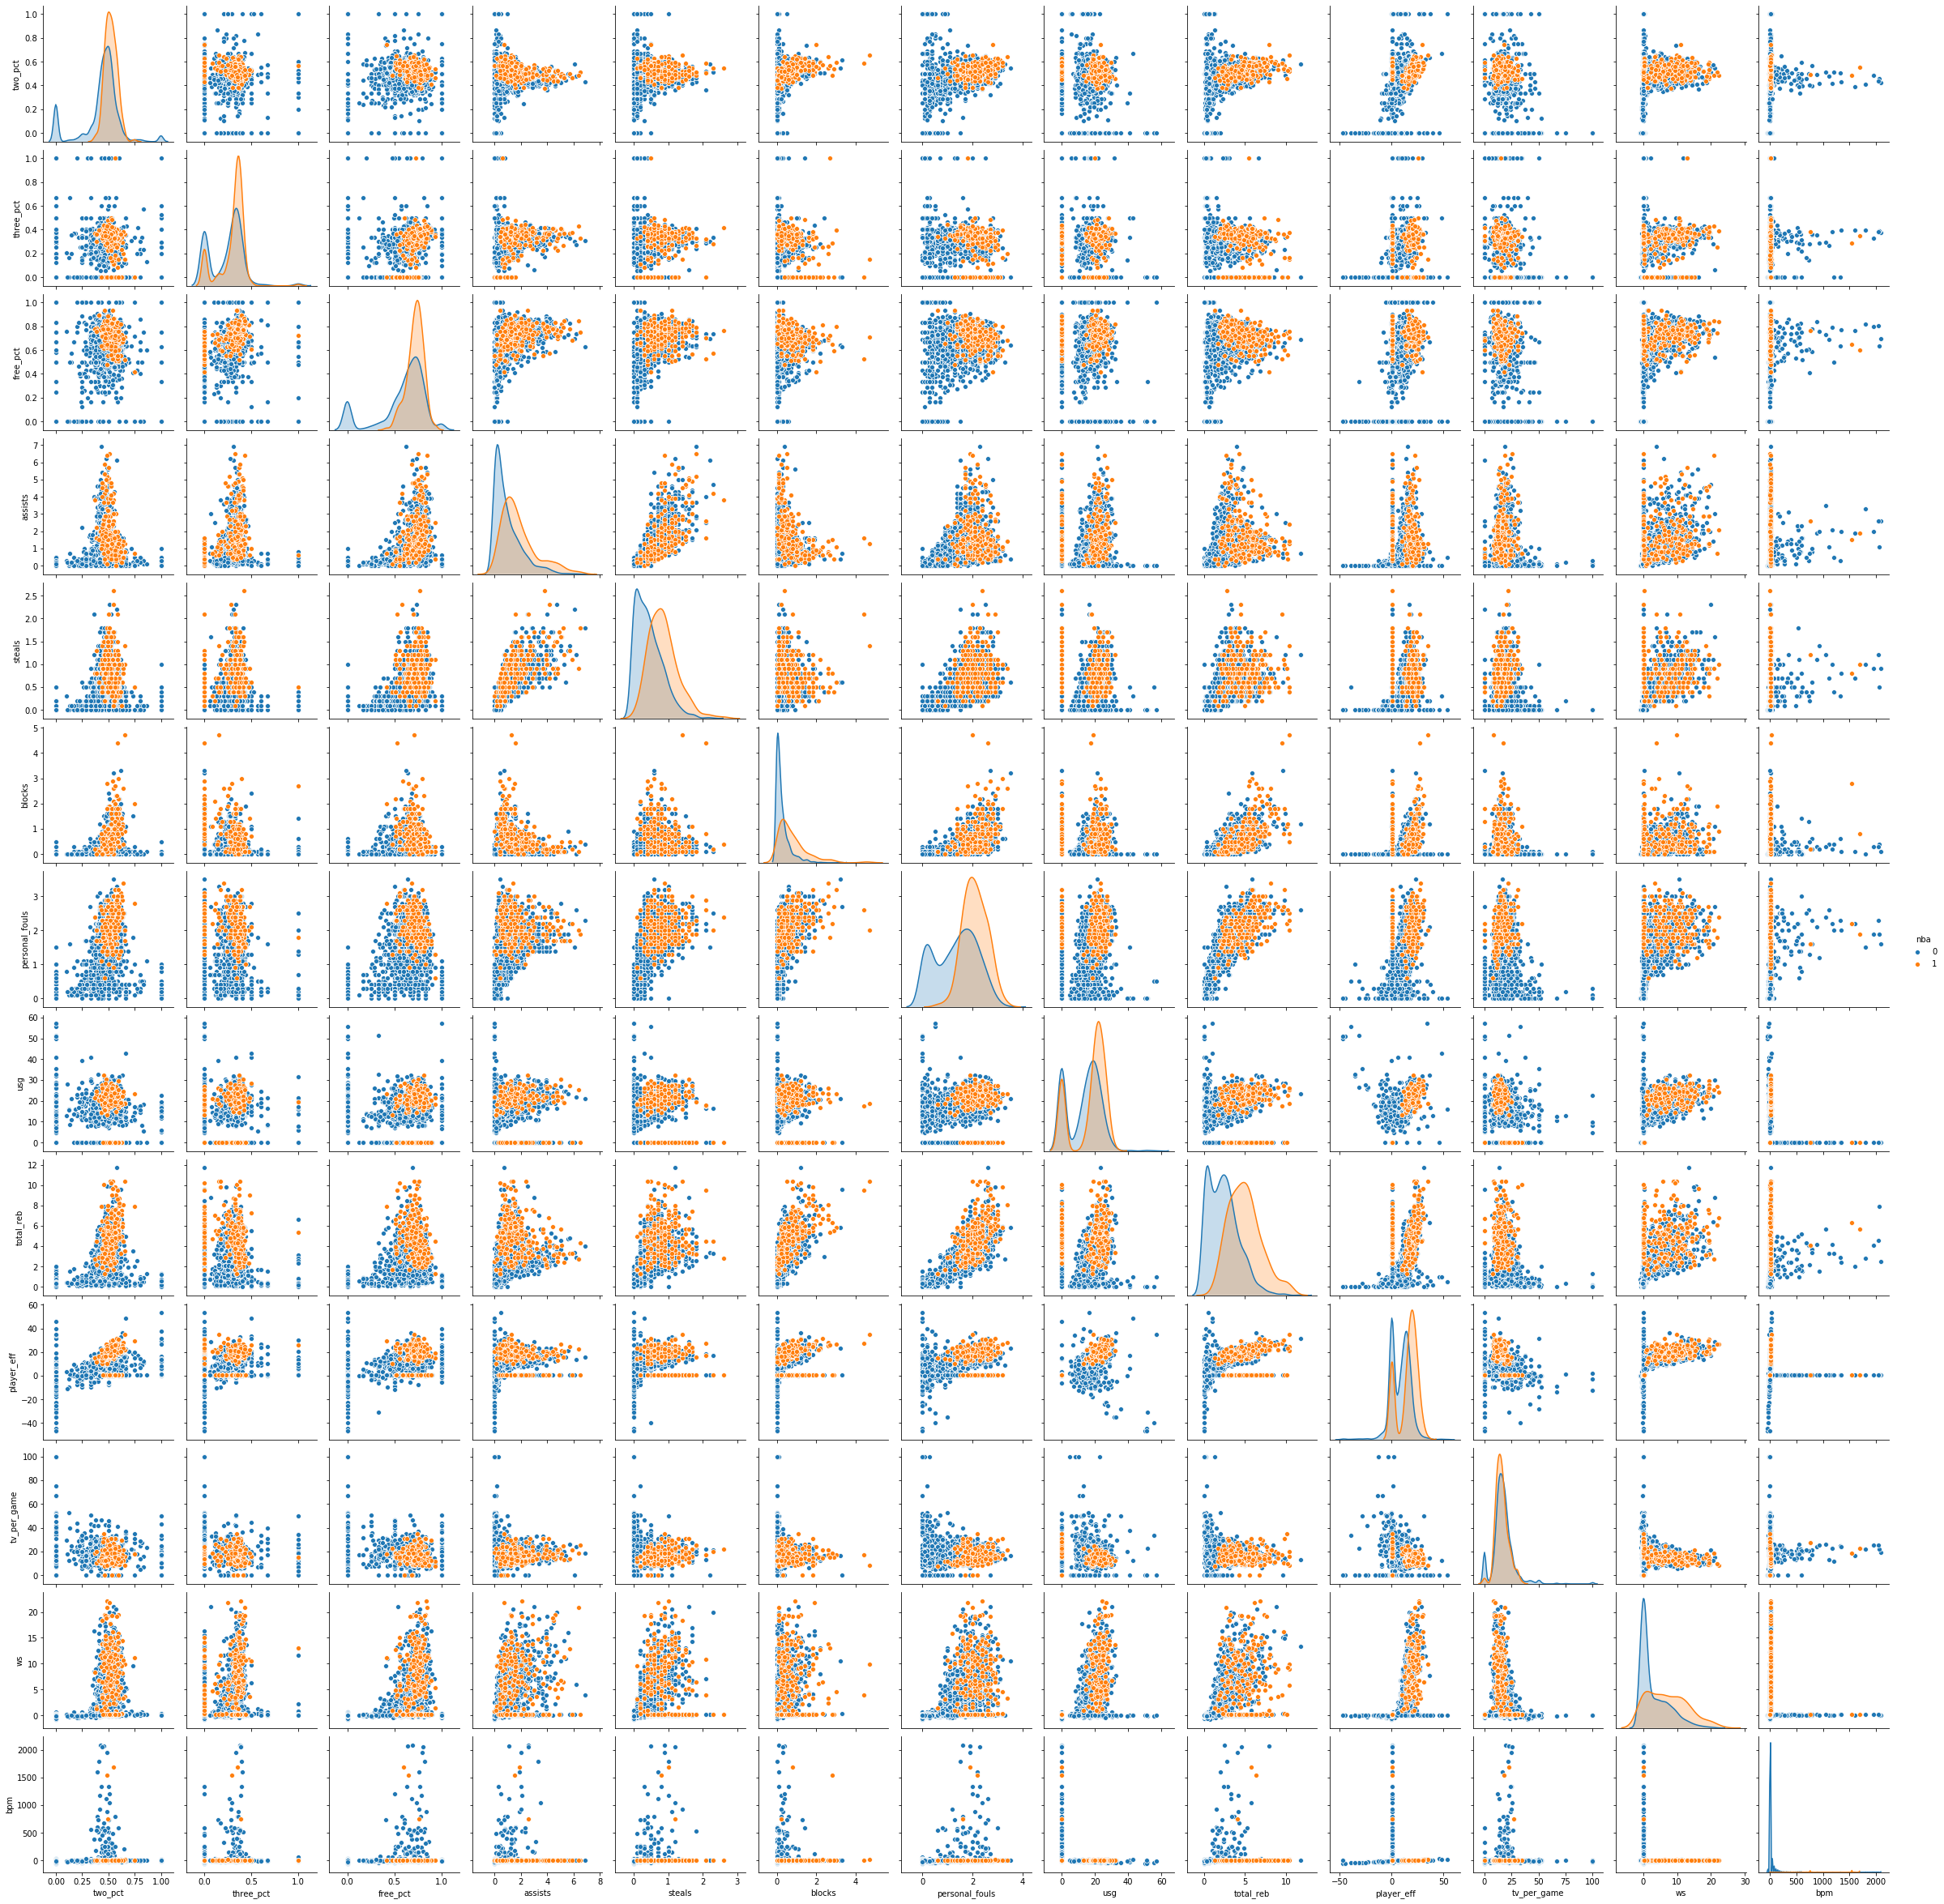

In [183]:
sns.pairplot(cbb_copy, hue='nba')
plt.show()

In [107]:
n=len(cbb_copy)
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(cbb_copy)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(cbb_copy,p))
print(hopkins_stats)

[0.060260062625445476, 0.04198308728226933, 0.0508189057942304, 0.04531563148500559, 0.06066424564338466]


In [384]:
target = 'nba'
y = cbb[target]
cbb = cbb.drop([target, 'position'], axis=1)
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(cbb, y)

sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=5, direction="forward"
).fit(cbb, y)

In [385]:
feature_names = np.array(cbb.columns)

feature_names[sfs_forward.get_support()]

array(['games_played', 'field_attmps', 'two_pointer', 'blocks', 'points'],
      dtype=object)

In [84]:
np.abs(ridge.coef_)

array([1.03056261e-03, 3.18860820e-04, 1.74492161e-03, 0.00000000e+00,
       7.68865289e-02, 1.16468260e-01, 4.76828763e-02, 2.10297392e-02,
       1.60091138e-02, 1.84813651e-02, 4.24155140e-02, 3.74671703e-02,
       3.38384845e-02, 5.82012931e-02, 1.55882215e-01, 1.11149252e-01,
       5.15478066e-02, 2.05920654e-04, 1.92056749e-03, 4.19455478e-04,
       5.30946647e-03, 2.51266768e-03, 1.41987915e-04, 5.54248548e-03,
       6.45784460e-05])

In [166]:
nba = cbb_copy[cbb_copy.nba == 1]
not_nba = cbb_copy[cbb_copy.nba == 0]

In [167]:
nba.describe()

two_pct   three_pct    free_pct     assists      steals      blocks  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.523490    0.300490    0.722125    1.869000    0.860500    0.795000   
std      0.056914    0.139844    0.088410    1.350056    0.419487    0.753734   
min      0.374000    0.000000    0.416000    0.000000    0.100000    0.000000   
25%      0.484000    0.271750    0.673250    0.875000    0.500000    0.300000   
50%      0.521500    0.343500    0.733000    1.500000    0.800000    0.550000   
75%      0.565000    0.377250    0.777500    2.400000    1.100000    1.100000   
max      0.746000    1.000000    0.935000    6.500000    2.600000    4.700000   

       personal_fouls         usg   total_reb  player_eff  tv_per_game  \
count      200.000000  200.000000  200.000000  200.000000   200.000000   
mean         2.111000   17.219500    4.998500   15.992740    16.127000   
std          0.481809    9.919017    1.961091    9.338155     5.688591   
min          0.600000    0.000000    1.300000    0.511000     0.000000   
25%          1.800000   15.525000    3.400000   13.025000    12.175000   
50%          2.100000   20.900000    4.800000   18.650000    15.300000   
75%          2.425000   23.825000    6.025000   22.600000    18.625000   
max          3.400000   32.200000   10.400000   35.100000    34.600000   

               ws          bpm    nba  
count  200.000000   200.000000  200.0  
mean     7.190300    25.447500    1.0  
std      5.797292   168.813199    0.0  
min      0.114000    -0.200000    1.0  
25%      1.450000     2.375000    1.0  
50%      6.400000     6.400000    1.0  
75%     11.350000     8.400000    1.0  
max     22.200000  1685.000000    1.0

In [110]:
not_nba.describe()

two_pct    three_pct     free_pct      assists       steals  \
count  1526.000000  1526.000000  1526.000000  1526.000000  1526.000000   
mean      0.436790     0.236914     0.586959     0.976606     0.447969   
std       0.182362     0.179362     0.255586     1.047569     0.386619   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.408000     0.000000     0.501250     0.200000     0.100000   
50%       0.471000     0.294000     0.666000     0.600000     0.400000   
75%       0.524000     0.354000     0.750000     1.400000     0.700000   
max       1.000000     1.000000     1.000000     6.900000     2.300000   

            blocks  personal_fouls          usg    total_reb   player_eff  \
count  1526.000000     1526.000000  1526.000000  1526.000000  1526.000000   
mean      0.266972        1.340957    13.394037     2.370577     8.663518   
std       0.364593        0.825086     9.799092     1.811151     9.324254   
min       0.000000        0.000000     0.000000     0.000000   -46.700000   
25%       0.000000        0.600000     0.000000     0.800000     0.532000   
50%       0.100000        1.400000    15.800000     2.200000    10.000000   
75%       0.400000        2.000000    20.600000     3.400000    15.200000   
max       3.300000        3.500000    57.000000    11.700000    53.700000   

       tv_per_game           ws          bpm     nba  
count  1526.000000  1526.000000  1526.000000  1526.0  
mean     17.224902     3.134343    26.222739     0.0  
std       9.637630     4.229271   163.321257     0.0  
min       0.000000    -0.784000   -57.000000     0.0  
25%      12.800000     0.074000    -0.500000     0.0  
50%      16.400000     0.600000     0.100000     0.0  
75%      20.600000     5.600000     3.700000     0.0  
max     100.000000    21.000000  2088.000000     0.0

In [358]:
df = cbb_copy.copy()
df = df.drop(['nba'], axis=1)

In [359]:
X = StandardScaler(with_std=False).fit_transform(df)

df = pd.DataFrame(X, columns = df.columns)

In [360]:
df.head()

two_pct  three_pct  free_pct   assists    steals    blocks  \
0  0.050744   0.119823  0.149269  0.913115  0.300761 -0.229567   
1  0.037744   0.154823  0.149269 -0.086885 -0.099239 -0.329567   
2 -0.008256   0.091823  0.015269 -0.586885 -0.299239 -0.229567   
3  0.068744   0.123823  0.224269  0.413115  0.500761 -0.029567   
4 -0.023256   0.066823  0.132269  1.613115  0.500761 -0.229567   

   personal_fouls        usg  total_reb  player_eff  tv_per_game       ws  \
0        0.262588   3.543033   0.109016    5.210083    -7.591569  9.56472   
1       -0.437412   1.343033  -1.190984    2.810083    -2.891569  3.66472   
2       -0.037412   6.543033  -0.390984    1.410083    -5.991569 -0.53528   
3        1.162588 -13.956967   1.309016   -8.997917     1.108431 -3.49128   
4        0.762588   7.443033   0.409016    4.110083     0.208431  4.66472   

         bpm  
0 -21.706792  
1 -22.306792  
2 -27.406792  
3 -26.406792  
4 -23.606792

In [361]:
cbb_copy.shape

(1708, 14)

In [362]:
X.shape

(1708, 13)

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


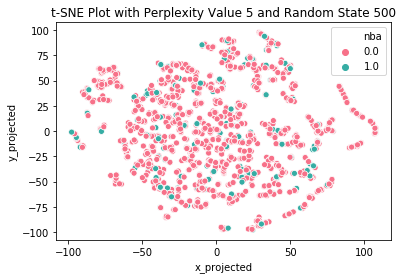

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


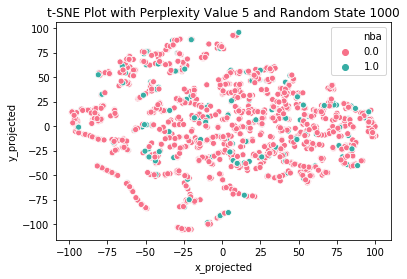

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


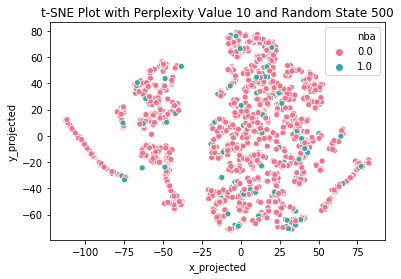

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


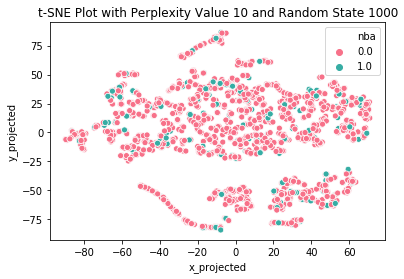

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


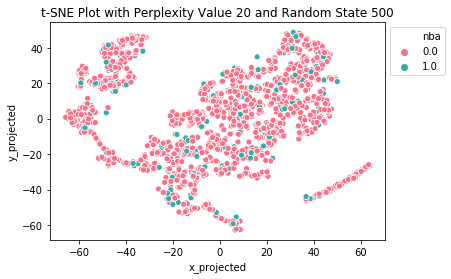

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


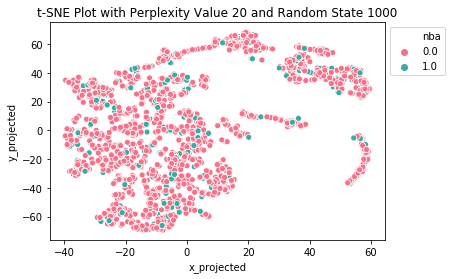

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


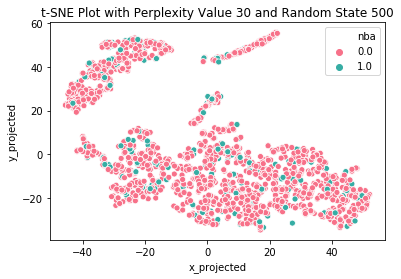

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


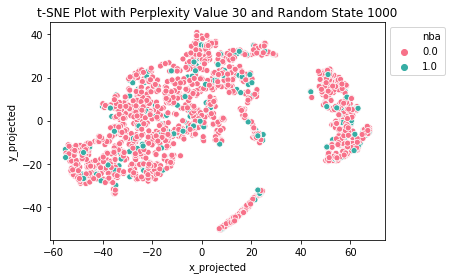

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


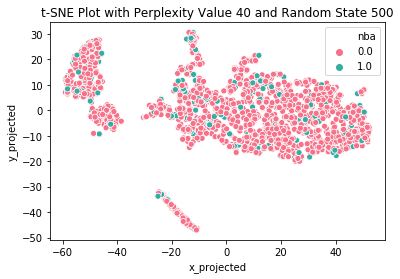

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


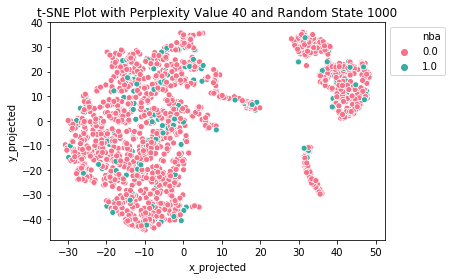

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


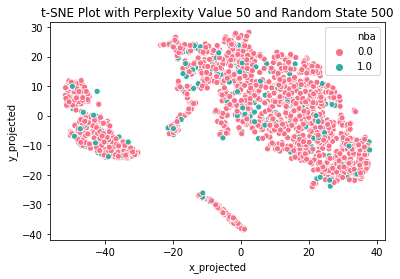

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


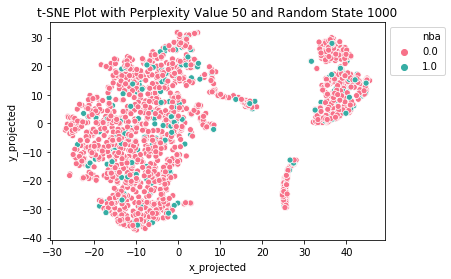

--------------------------------------------


In [151]:
for perp in [5,10, 20, 30, 40, 50]: 
    for rs in [500, 1000]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        df_combo['nba'] = cbb['nba']
        sns.scatterplot(x='x_projected',y='y_projected', hue='nba', palette=sns.color_palette("husl", 2), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


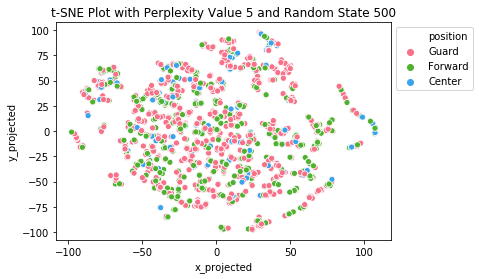

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


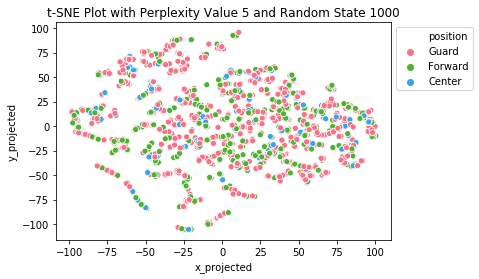

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


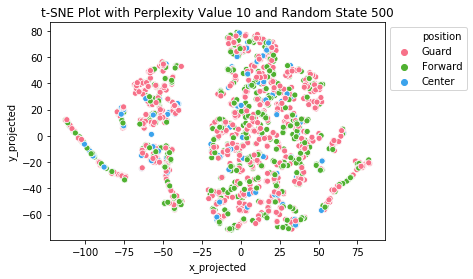

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


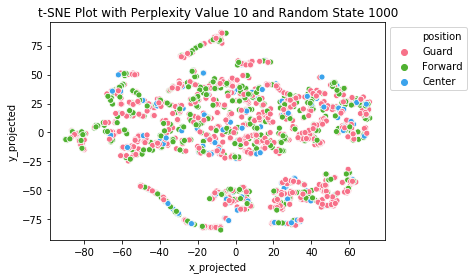

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


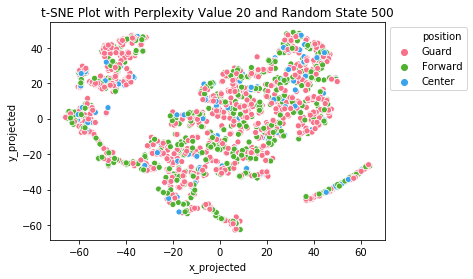

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


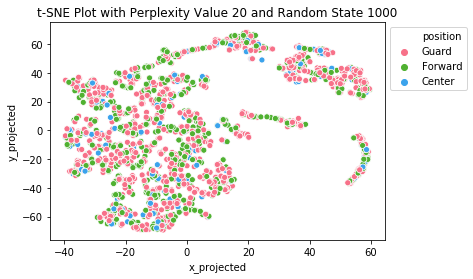

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


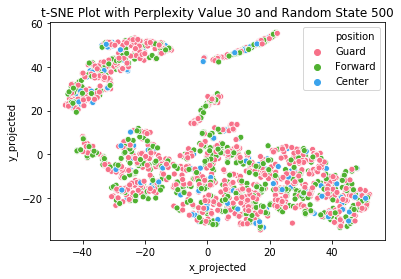

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


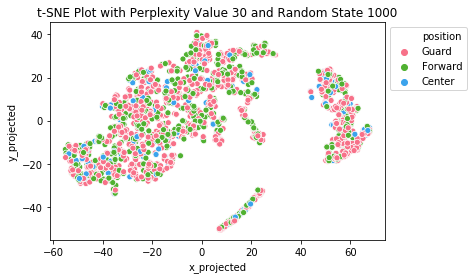

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


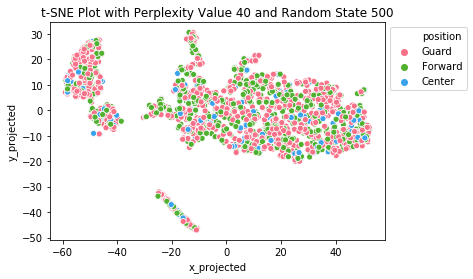

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


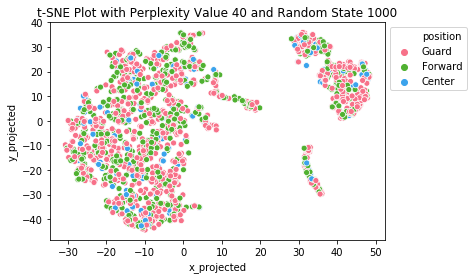

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


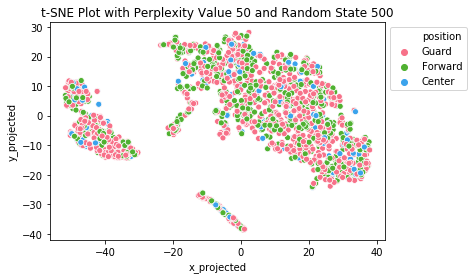

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


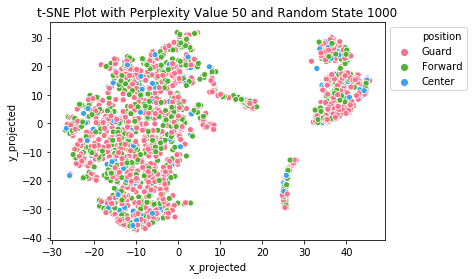

--------------------------------------------


In [152]:
for perp in [5,10, 20, 30, 40, 50]: 
    for rs in [500, 1000]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        df_combo['position'] = cbb['position']
        sns.scatterplot(x='x_projected',y='y_projected', hue='position', palette=sns.color_palette("husl", 3), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


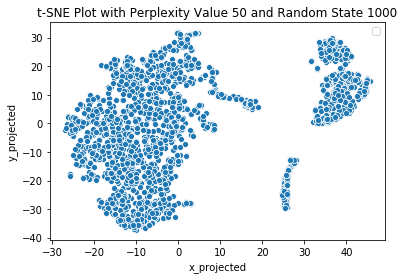

In [154]:
perp = 50
rs = 1000

tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11


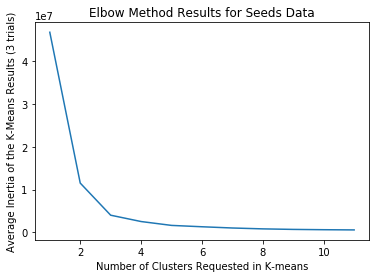

In [158]:
cluster_num_list=range(1,12)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))
    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Seeds Data')
plt.show()

In [363]:
kmeans=KMeans(n_clusters=3).fit(X)
df['predicted_cluster_kmeans']=kmeans.labels_

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


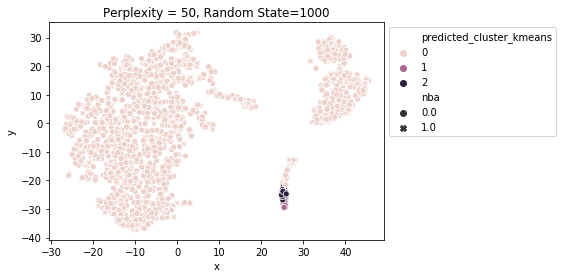

In [364]:
# Perform the TSNE non-linear dimensionality reduction
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(X)
#concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the sam
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)
dff['nba'] = cbb['nba']
# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', hue='predicted_cluster_kmeans', style='nba', data=dff)
plt.title('Perplexity = 50, Random State=1000')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [365]:
sub_cols = ['ws', 'assists', 'steals', 'total_reb', 'player_eff', 'blocks']

sub_df = df[sub_cols]

In [366]:
X = StandardScaler(with_std=False).fit_transform(sub_df)

sub_df = pd.DataFrame(X, columns = sub_df.columns)

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


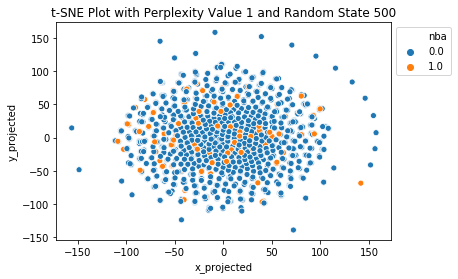

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


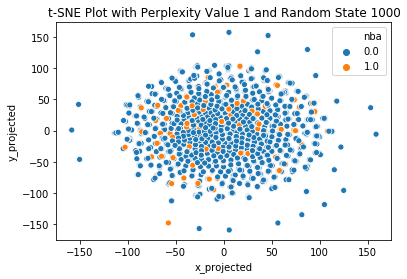

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


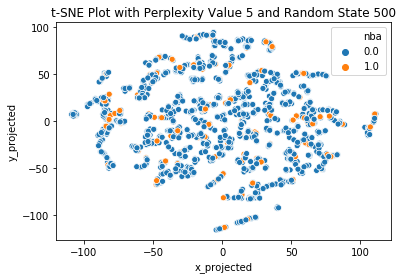

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


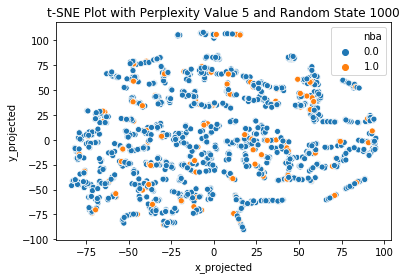

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


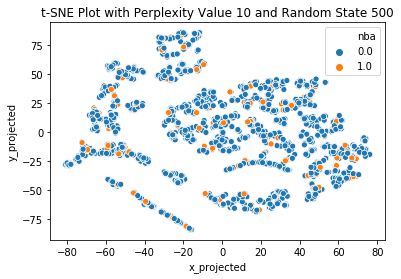

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


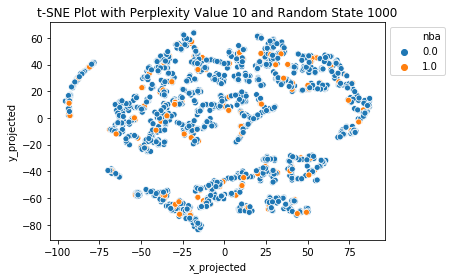

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


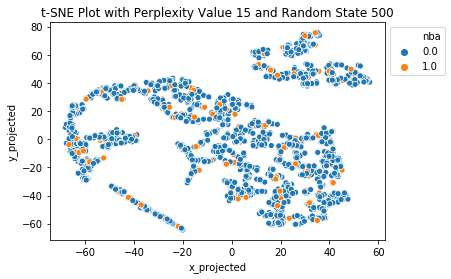

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


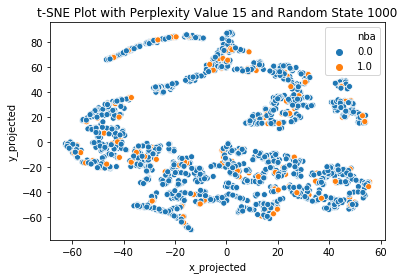

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


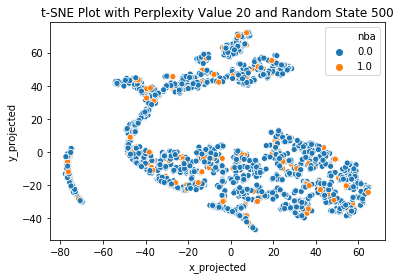

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


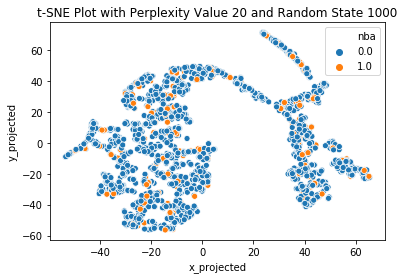

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


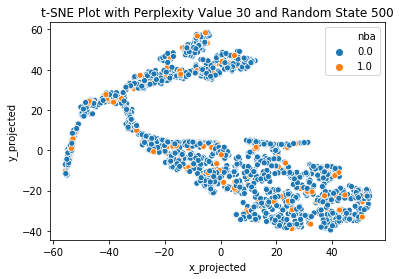

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


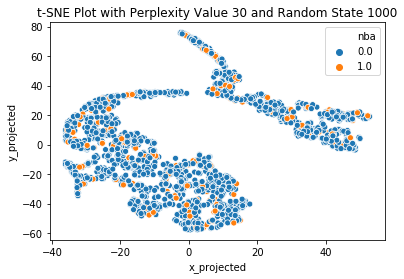

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


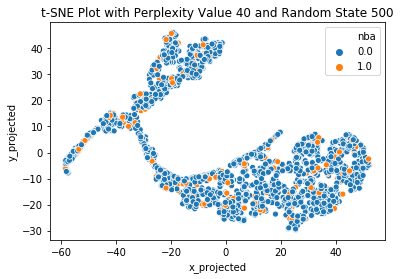

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


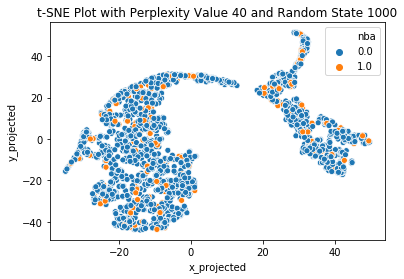

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


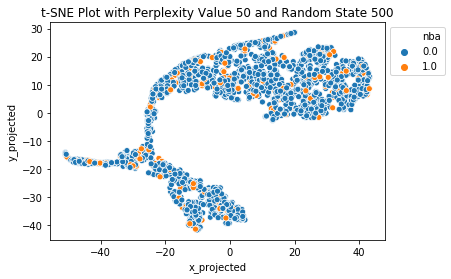

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


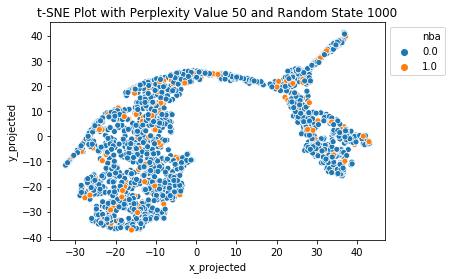

--------------------------------------------


/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


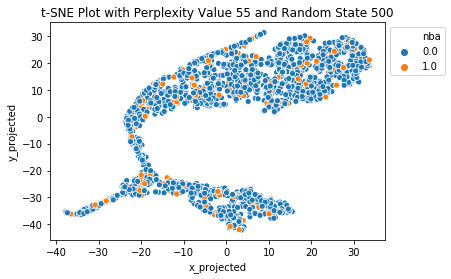

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


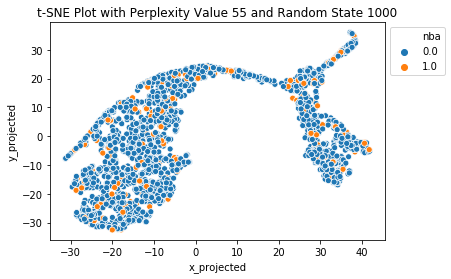

--------------------------------------------


In [369]:
for perp in [1, 5, 10, 15, 20, 30, 40, 50, 55]: 
    for rs in [500, 1000]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(sub_df)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([sub_df, df_tsne], axis=1)
        df_combo['nba'] = cbb['nba']
        sns.scatterplot(x='x_projected',y='y_projected', hue='nba', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11


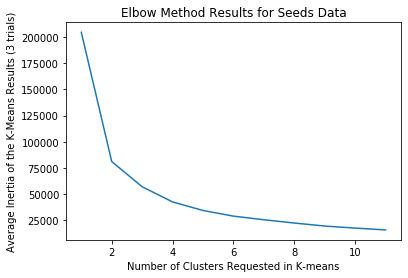

In [370]:
cluster_num_list=range(1,12)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))
    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Seeds Data')
plt.show()

In [381]:
kmeans=KMeans(n_clusters=3).fit(X)
sub_df['predicted_cluster_kmeans']=kmeans.labels_

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


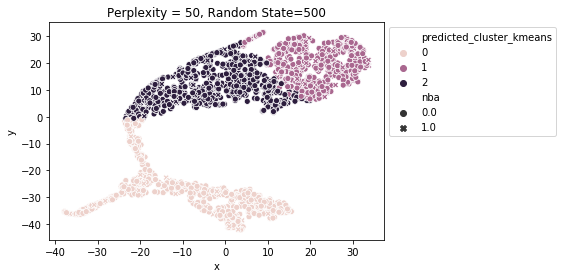

In [382]:
# Perform the TSNE non-linear dimensionality reduction
perp = 55
rs = 500

tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(X)
#concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the sam
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([sub_df, df_tsne], axis=1)
dff['nba'] = cbb['nba']
# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', hue='predicted_cluster_kmeans', style='nba', data=dff)
plt.title('Perplexity = 50, Random State=500')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

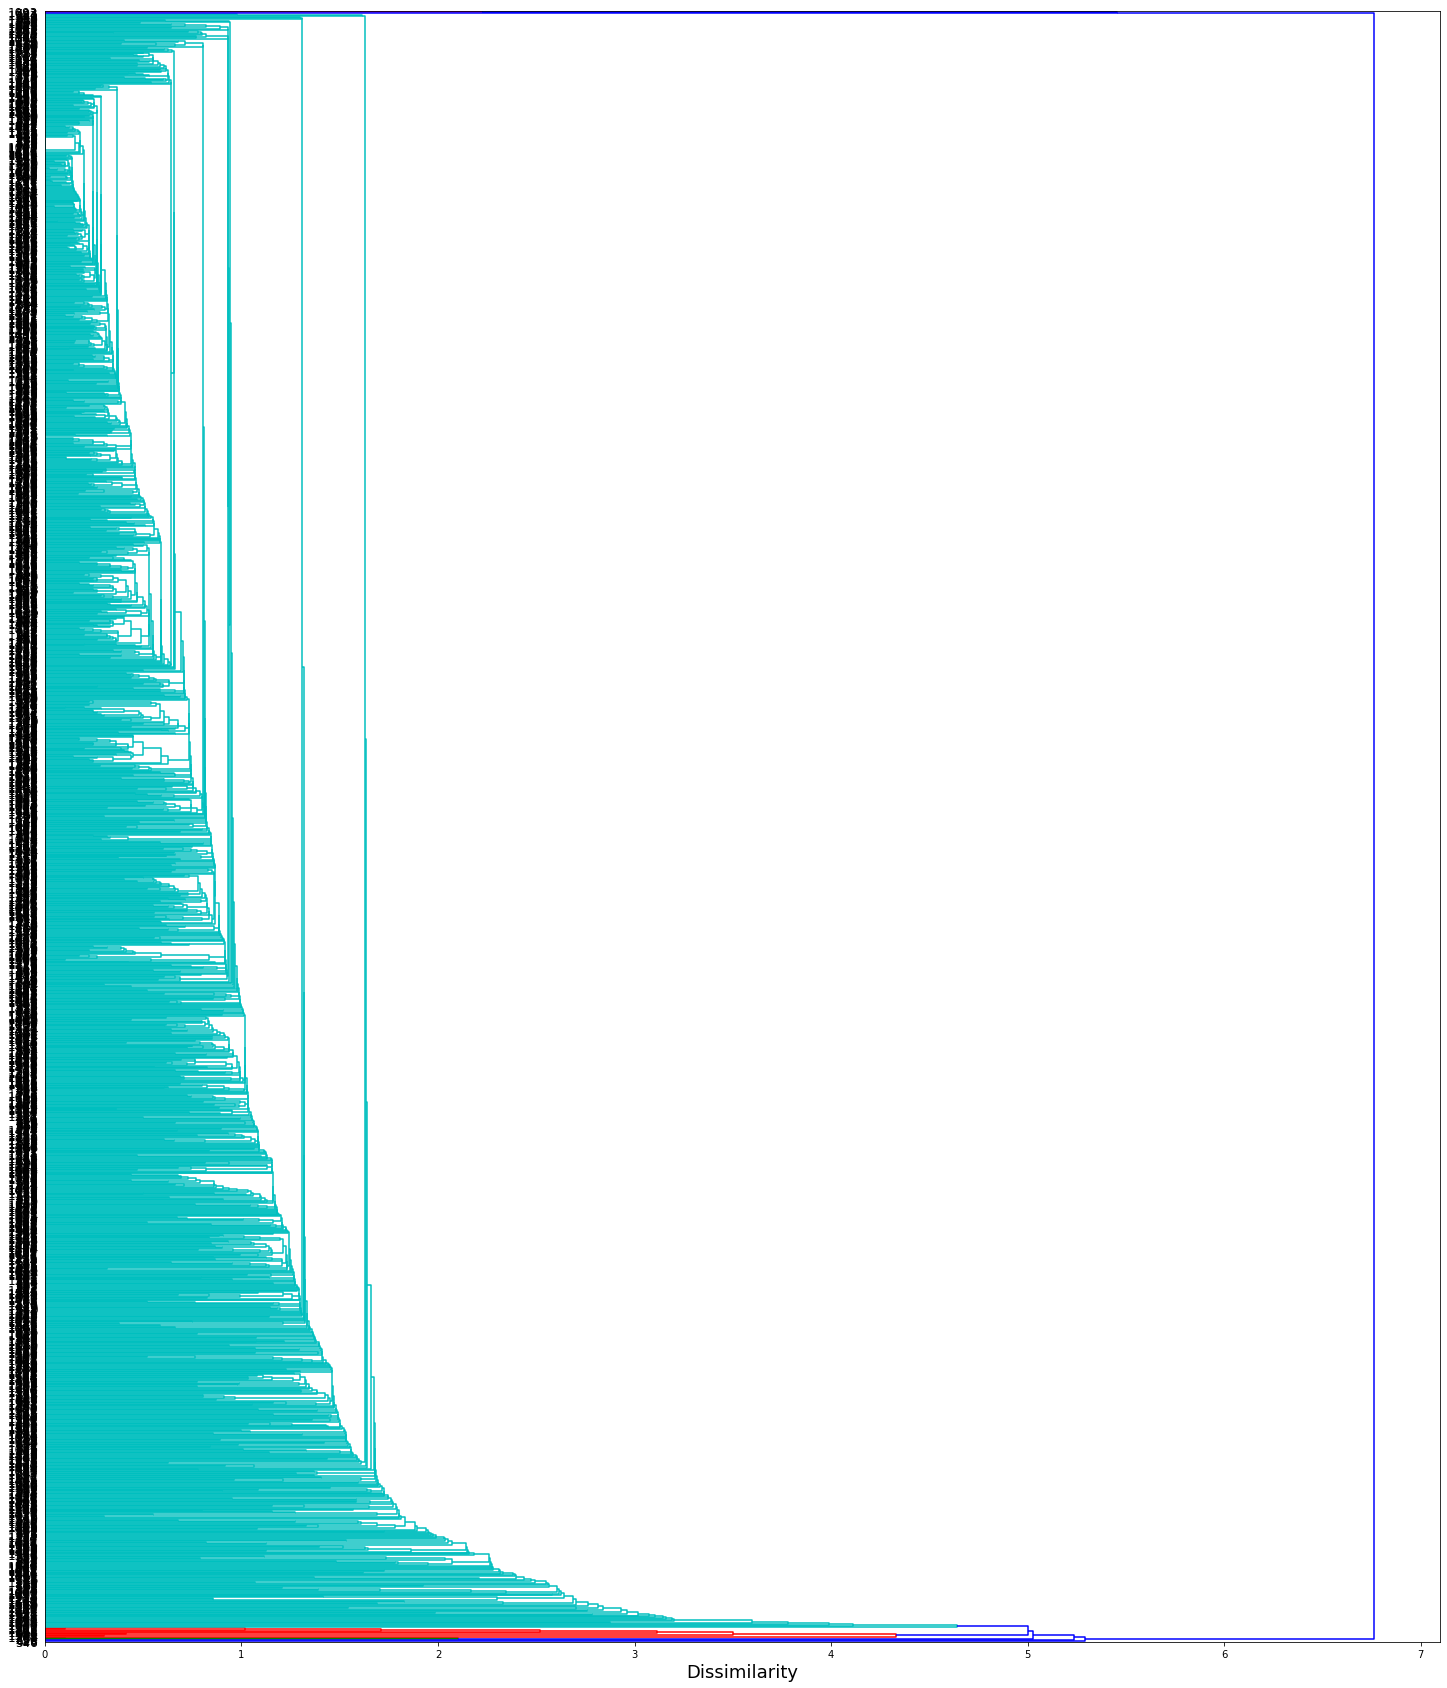

In [383]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='single')
fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

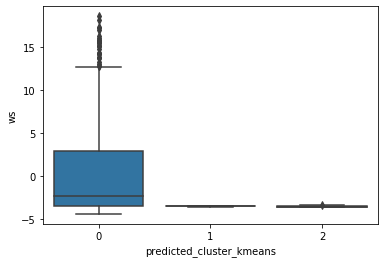

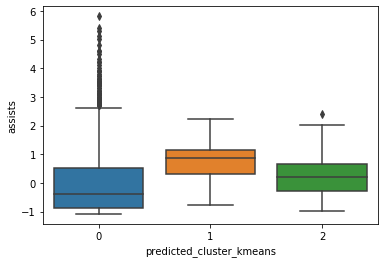

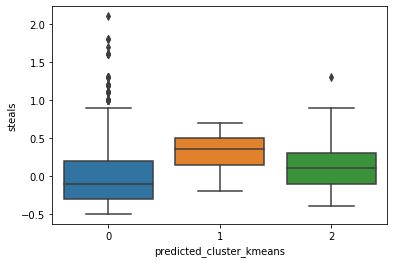

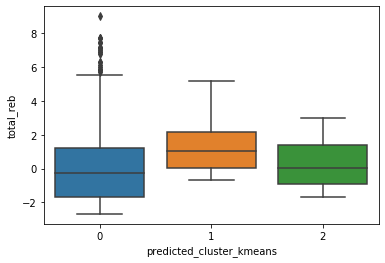

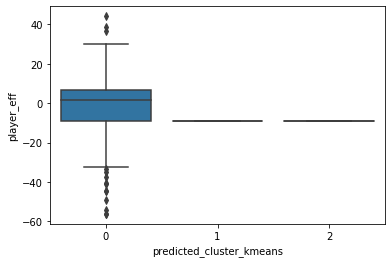

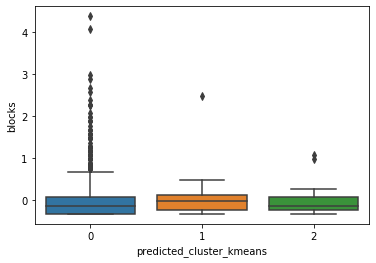

In [386]:
for col in sub_cols:
    sns.boxplot(x='predicted_cluster_kmeans', y=col, data=df)
    plt.show()